In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/guns

/gdrive/MyDrive/guns


In [4]:
ls

'Guns incident Data.csv'


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [7]:
df=pd.read_csv('Guns incident Data.csv')
df.head()

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police_involvement
0,1,2017,1,06-01-17,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-17,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-17,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-17,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-17,Suicide,High School,Male,32.0,White,100,Other specified,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   S.No.               100798 non-null  int64  
 1   Year                100798 non-null  int64  
 2   Month               100798 non-null  int64  
 3   Date                100798 non-null  object 
 4   Reason              100798 non-null  object 
 5   Education           99376 non-null   object 
 6   Sex                 100798 non-null  object 
 7   Age                 100780 non-null  float64
 8   Race                100798 non-null  object 
 9   Hispanic            100798 non-null  int64  
 10  Place of incident   99414 non-null   object 
 11  Police_involvement  100798 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [9]:
df.describe()

,S.No.,Year,Month,Age,Hispanic,Police_involvement
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100798.000000
mean,50399.500000,2018.000357,6.567601,44.857601,114.179607,0.013909
std,29098.020554,0.816278,3.405609,19.496181,61.595734,0.117114
min,1.000000,2017.000000,1.000000,1.000000,100.000000,0.000000
25%,25200.250000,2017.000000,4.000000,28.000000,100.000000,0.000000
50%,50399.500000,2018.000000,7.000000,43.000000,100.000000,0.000000
75%,75598.750000,2019.000000,9.000000,59.000000,100.000000,0.000000
max,100798.000000,2019.000000,12.000000,108.000000,998.000000,1.000000


# EDA

In [10]:
df.isna().sum()

S.No.                    0
Year                     0
Month                    0
Date                     0
Reason                   0
Education             1422
Sex                      0
Age                     18
Race                     0
Hispanic                 0
Place of incident     1384
Police_involvement       0
dtype: int64

In [15]:
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Place of incident'].fillna(df['Place of incident'].mode()[0], inplace=True)

In [11]:
df.columns

Index(['S.No.', 'Year', 'Month', 'Date', 'Reason', 'Education', 'Sex', 'Age',
       'Race', 'Hispanic', 'Place of incident', 'Police_involvement'],
      dtype='object')

In [12]:
df.Police_involvement.value_counts()

0    99396
1     1402
Name: Police_involvement, dtype: int64

In [13]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [ ]:
binary_cols

['Sex', 'Police_involvement']

In [17]:
Sex_numeric = {'Male':1, 'Female':0}
df.Sex.replace(Sex_numeric, inplace=True)

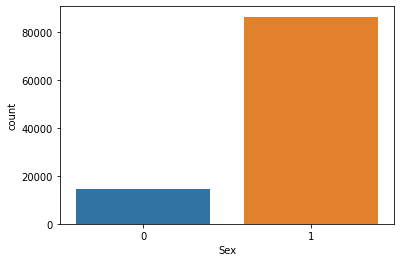

In [18]:
sns.countplot("Sex", data=df)

In [21]:
Reason_numeric = {'Accidental':1, 'Suicide':0,'Undetermined':2,'Homicide':3}
df.Reason.replace(Reason_numeric, inplace=True)

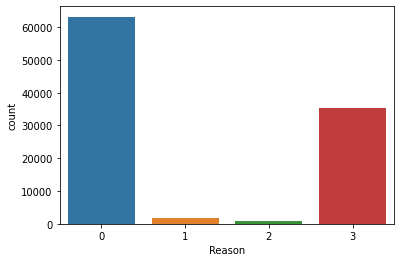

In [23]:
sns.countplot("Reason", data=df)

In [25]:
Education_numeric = {'Some college':1, 'Bachelors':0,'High School':2,'Less than High School':3}
df.Education.replace(Education_numeric, inplace=True)

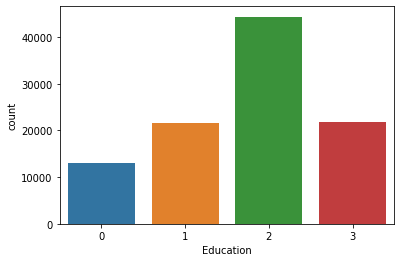

In [26]:
sns.countplot("Education", data=df)

In [36]:
Race_numeric = {'White':1, 'Asian/Pacific Islander':0,'Native American/Native Alaskan':2,'Black':3,'Hispanic':4}
df.Race.replace(Race_numeric, inplace=True)

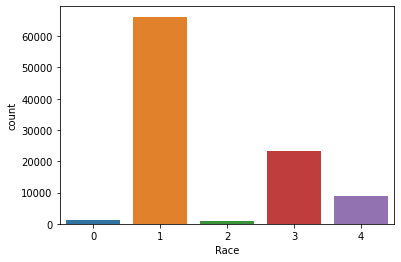

In [37]:
sns.countplot("Race", data=df)

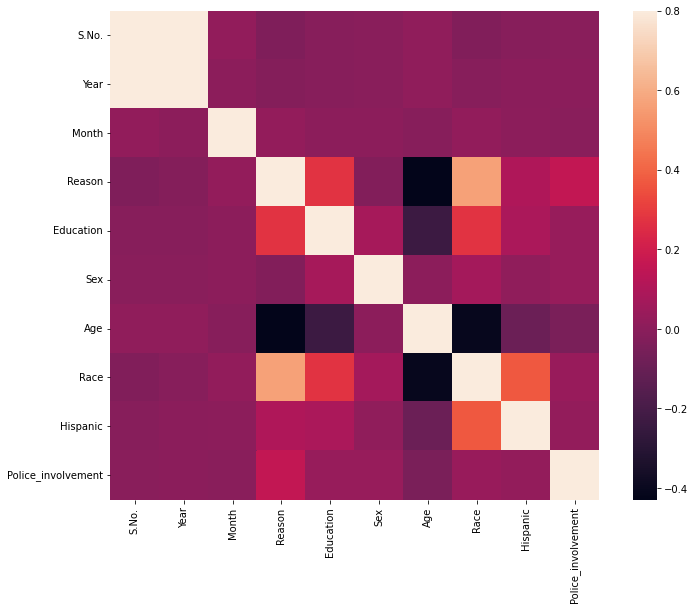

In [38]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

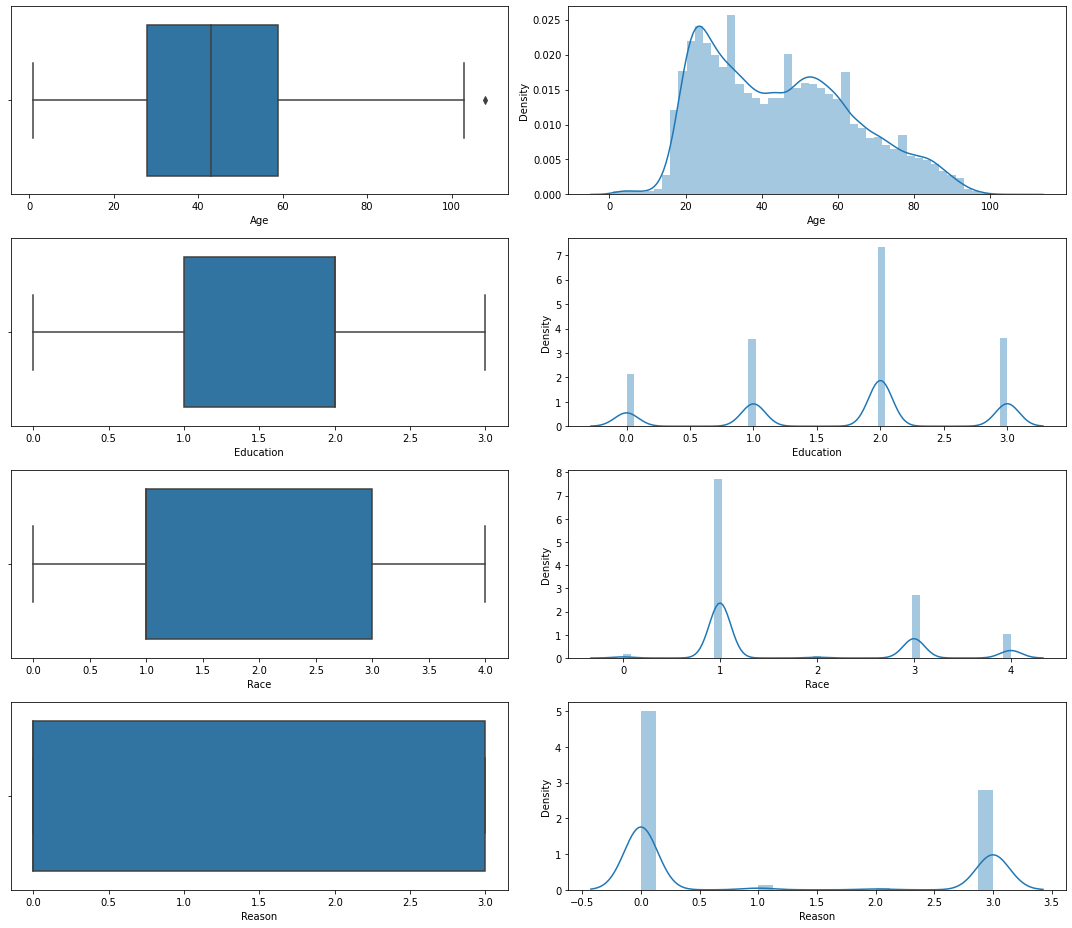

In [42]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df["Age"], ax = ax[0,0])
sns.distplot(df['Age'], ax = ax[0,1])
sns.boxplot(x= df["Education"], ax = ax[1,0])
sns.distplot(df['Education'], ax = ax[1,1])
sns.boxplot(x= df["Race"], ax = ax[2,0])
sns.distplot(df['Race'], ax = ax[2,1])
sns.boxplot(x= df["Reason"], ax = ax[3,0])
sns.distplot(df['Reason'], ax = ax[3,1])
plt.tight_layout()

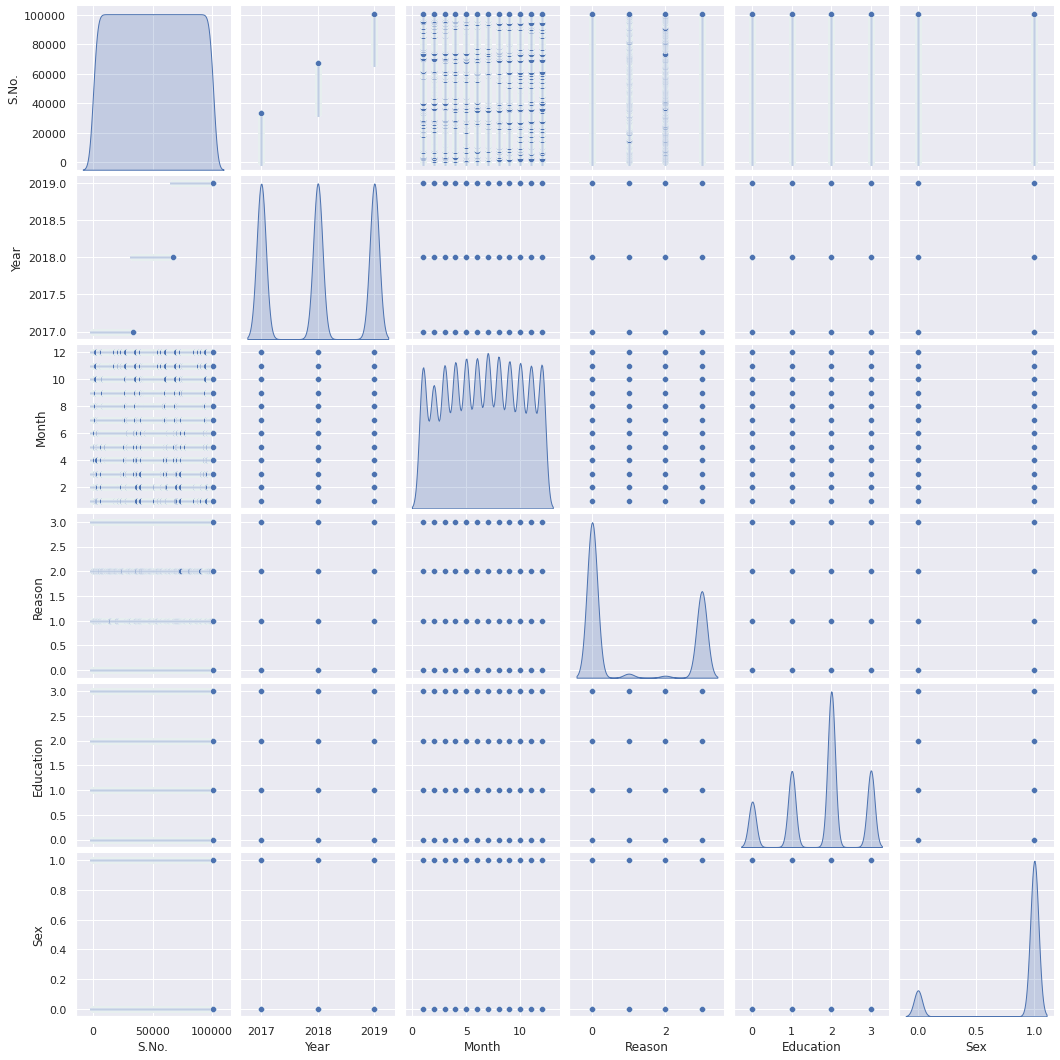

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

Text(0, 0.5, 'Race')

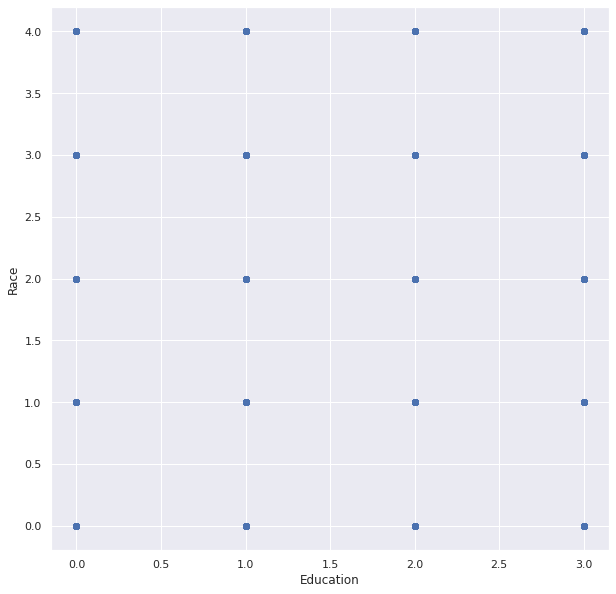

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(x='Education',y='Race',data=df)
plt.xlabel('Education')
plt.ylabel('Race')

In [66]:
X = df.drop(['Date','Police_involvement','Place of incident'], axis = 1)
Y = df["Police_involvement"]
x_Data = X.values
y_Data = Y.values

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [72]:
model.score(X_test,y_test)

0.9833829365079365

In [73]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.98617312 0.98617312 0.98332093 0.98375395 0.98313387]


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [75]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.9843994146680225

In [76]:
confusion_matrix(y_train, pred)

array([[79378,   146],
       [ 1112,     2]])

In [77]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [78]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [79]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19872
           1       0.04      0.01      0.01       288

    accuracy                           0.98     20160
   macro avg       0.51      0.50      0.50     20160
weighted avg       0.97      0.98      0.98     20160



In [80]:
cma = confusion_matrix(y_test, predicted_test)

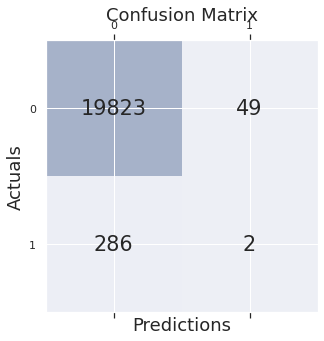

In [81]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [82]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [83]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9862223765470374

In [84]:
confusion_matrix(y_train, pred)

array([[79524,     0],
       [ 1111,     3]])

In [85]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [86]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [87]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19872
           1       0.00      0.00      0.00       288

    accuracy                           0.99     20160
   macro avg       0.49      0.50      0.50     20160
weighted avg       0.97      0.99      0.98     20160



In [88]:
cma = confusion_matrix(y_test, pred_test)

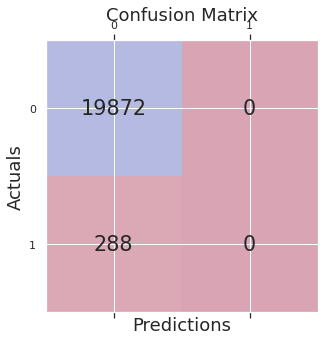

In [89]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [90]:
from sklearn import tree

In [91]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [92]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [93]:
confusion_matrix(y_train, pred1)

array([[79524,     0],
       [    0,  1114]])

In [94]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [95]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19872
           1       0.07      0.08      0.08       288

    accuracy                           0.97     20160
   macro avg       0.53      0.53      0.53     20160
weighted avg       0.97      0.97      0.97     20160



In [96]:
cma = confusion_matrix(y_test, pred1_test)

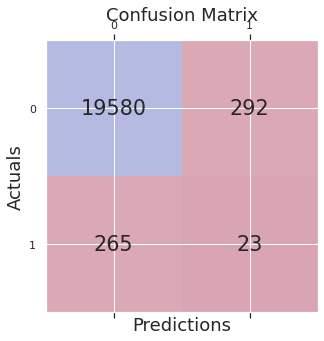

In [97]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [99]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.9861851732433841

In [100]:
confusion_matrix(y_train, pred_LR)

array([[79524,     0],
       [ 1114,     0]])

In [101]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [102]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19872
           1       0.00      0.00      0.00       288

    accuracy                           0.99     20160
   macro avg       0.49      0.50      0.50     20160
weighted avg       0.97      0.99      0.98     20160



In [103]:
cma = confusion_matrix(y_test, pred_LR_test)

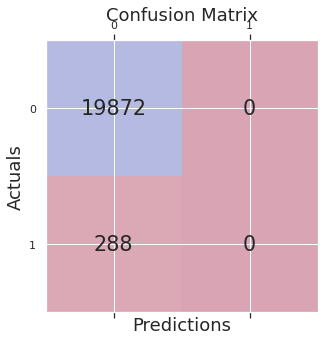

In [104]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [106]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [107]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.9831593045462437

In [108]:
confusion_matrix(y_train, pred_SVM)

array([[79270,   254],
       [ 1104,    10]])

In [109]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [110]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19872
           1       0.00      0.00      0.00       288

    accuracy                           0.98     20160
   macro avg       0.49      0.50      0.50     20160
weighted avg       0.97      0.98      0.98     20160



In [112]:
cma = confusion_matrix(y_test, pred_SVM_test)

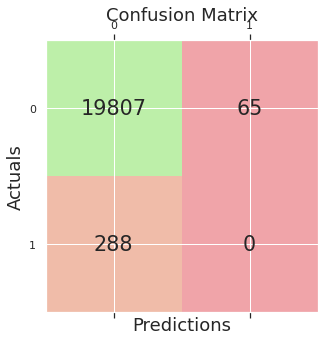

In [113]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [114]:
from sklearn.neural_network import MLPClassifier

In [115]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [116]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.9861851732433841

In [117]:
confusion_matrix(y_train, pred_SVM)

array([[79270,   254],
       [ 1104,    10]])

In [118]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [119]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19872
           1       0.00      0.00      0.00       288

    accuracy                           0.99     20160
   macro avg       0.49      0.50      0.50     20160
weighted avg       0.97      0.99      0.98     20160



In [120]:
cma = confusion_matrix(y_test, pred_NN_test)

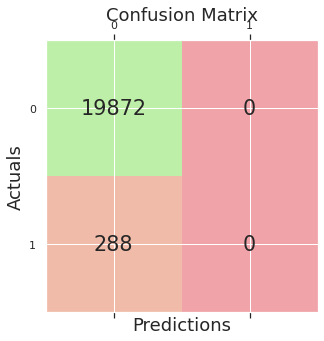

In [121]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

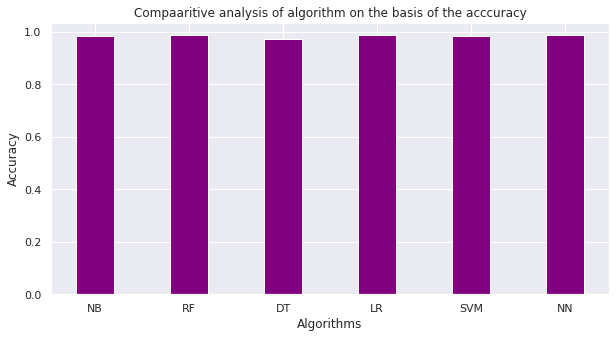

In [125]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='purple',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


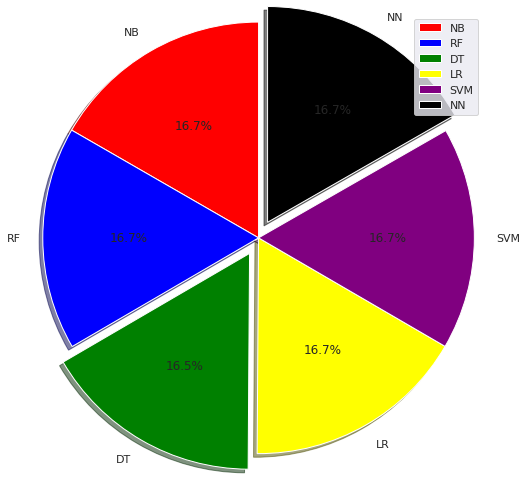

In [124]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN'] 
# portion covered by each label
slices = [p,q,r,s,t,u]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()